In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special

In [2]:
# Type 3

Text(0.5, 1.0, 'Type 3')

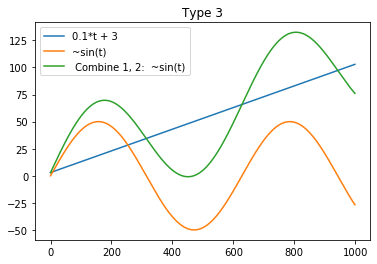

In [35]:
# time index is a sequence of integer from 0 to 999
t = np.arange(1000) 

m = 0.1
c = 3
y1 = m * t + c
# y2 = 50* np.sin(t * 100) + np.cos(t)
y2 = 50 * np.sin(t / 100) # divide by 1000 because two radians is one cycle. 

# Amplitude-ish multiplier makes the curve looks HUGE!
# Try change it from 10 to 20, 30, 40

plt.plot(t, y1, label='{m}*t + {c}'.format(m=m,c=c))
plt.plot(t, y2, label='~sin(t)')

# H_3 linear addition between y1 and y2
y3 = y1 + y2

plt.plot(t, y3, label=' Combine 1, 2:  ~sin(t)')


plt.legend()
plt.title('Type 3')

In [21]:
# Type 4

Text(0.5, 1.0, 'Type 4')

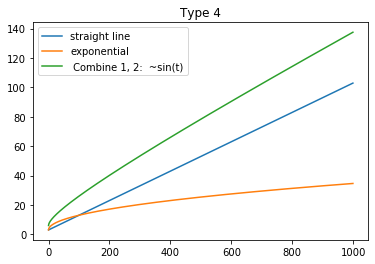

In [36]:
# time index is a sequence of integer from 0 to 999
t = np.arange(1000) 

m = 0.1
c = 3
y1 = m * t + c

y2 = t ** 0.5 + c

plt.plot(t, y1, label='straight line')
plt.plot(t, y2, label='exponential')


# H_4 linear addition between y1 and y2
y4 = y1 + y2
plt.plot(t, y4, label=' Combine 1, 2:  ~sin(t)')

plt.legend()
plt.title('Type 4')

In [23]:
# Type 5

Text(0.5, 1.0, 'Type 5')

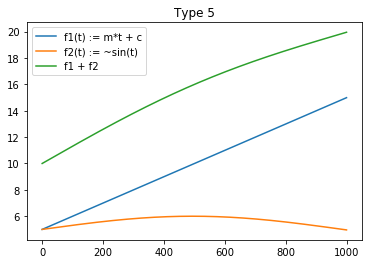

In [37]:
# time index is a sequence of integer from 0 to 999
t = np.arange(1000) 

y1 = 0.01 * t + 5

# 2 PI times 50
y2 = np.sin(t / (2*np.pi * 50)) + 5

plt.plot(t, y1, label='f1(t) := m*t + c')
plt.plot(t, y2, label='f2(t) := ~sin(t)')

y3 = y1 + y2
plt.plot(t, y3, label='f1 + f2')

plt.legend()
plt.title('Type 5')

In [25]:
# Taylor's series

In [26]:
#
# FIXME: the code below doesn't really do anything... 
# I tried to build Taylor series approximator function with limited iteration. 

def taylor_series(x, n):
    """
    Implements taylor series approximation for Sine function up to n-th term.
    https://en.wikipedia.org/wiki/Sine
    """
    if n > 5:
        raise Exception("Only support up to 5th term.")
    term = [] # term dictionary
    term = range(n) # 1..n generator
    y = 0.0 # approx. value of Sine x

    # Taylor's approximation for sine function.
    # y = x - x^3/3! + x^5/5! - x^7/7! + ....
    #
    for k, t in enumerate(term):
        # 0-th term is even. First approx val is just x.
        if k == 0:
          y += x
        if k % 2 == 0: # Determine if k is odd or even. 
          pass # Even
          y -= x**t / scipy.special.factorial(x)
        else: 
          pass # Odd
          y += x**t / scipy.special.factorial(x)
    return y

taylor_series(4, 4)

# help(np.arange)


taylor_series(np.pi, 1)
taylor_series(np.pi, 2)
taylor_series(np.pi, 3)
taylor_series(np.pi, 4)



6.380045216046087

# Five Type of simulated data

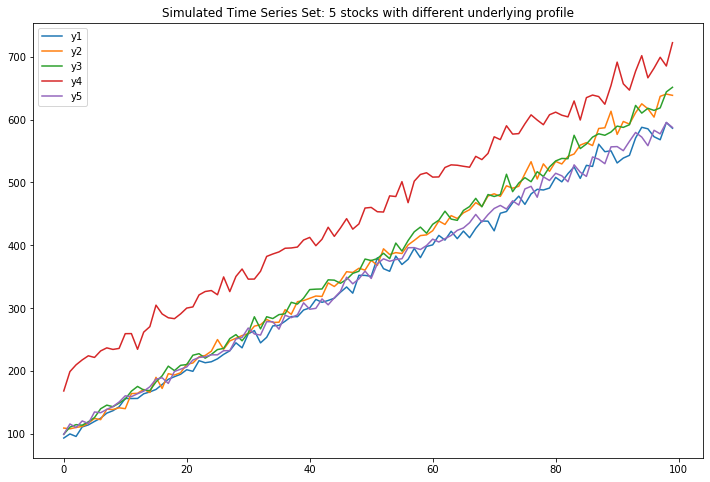

In [42]:
x = np.arange(0,100)
iid_noise = lambda : np.random.normal(0,5,x.size)
m_std = 0.1

def time_series_data_type1(m, c, m_std = 0.1):
    m = m + np.random.normal(0,m_std,x.size)
    c = c + iid_noise()
    y = m * x + c
    return y

def time_series_data_type2(m, c, m_std = 0.1):
    m = m + np.random.normal(0,m_std,x.size)
    c = c + iid_noise()
    y = m * (x ** 1.02)  + c
    return y


def time_series_data_type3(m, c, m_std = 0.1):
    t = x # x is global which is x for all series in the set
    
    m = m + np.random.normal(0,m_std,x.size) # add noise
    c = c + iid_noise()
    
    y1 = m * t + c
    # y2 = 50* np.sin(t * 100) + np.cos(t)
    y2 = 50 * np.sin(t / 100) # divide by 1000 because two radians is one cycle. 

    # Amplitude-ish multiplier makes the curve looks HUGE!
    # Try change it from 10 to 20, 30, 40, 50
    y3 = y1 + y2 # linear addition between y1 and y2
    return y3

def time_series_data_type4(m, c, a = 0.5, m_std = 0.1):
    t = x # x is global which is x for all series in the set
    m = m + np.random.normal(0,m_std,x.size) # add noise
    c = c + iid_noise()
    y1 = m * t + c
    y2 = t ** a + c # a argument is the exponent
    y3 = y1 + y2 # linear addition between y1 and y2
    return y3

def time_series_data_type5(m, c, m_std = 0.1):
    t = x # x is global which is x for all series in the set
    m = m + np.random.normal(0,m_std,x.size) # add noise
    c = c + iid_noise()
    y1 = m * t + c

    # 2 PI times 50
    y2 = np.sin(t / (2*np.pi * 50)) + 5
    y3 = y1 + y2 # linear addition between y1 and y2
    return y3


dgf_1 = time_series_data_type1
dgf_2 = time_series_data_type2
dgf_3 = time_series_data_type3
dgf_4 = time_series_data_type4
dgf_5 = time_series_data_type5

y1 = dgf_1(m=5, c=100)
y2 = dgf_2(m=5, c=100)
y3 = dgf_3(m=5, c=100)
y4 = dgf_4(m=5, c=100)
y5 = dgf_5(m=5, c=100)


plt.figure(figsize=(12,8))
plt.plot(x, y1, label='y1')
plt.plot(x, y2, label='y2')
plt.plot(x, y3, label='y3')
plt.plot(x, y4, label='y4')
plt.plot(x, y5, label='y5')
plt.legend()
plt.title('Simulated Time Series Set: 5 stocks with different underlying profile')
plt.show()

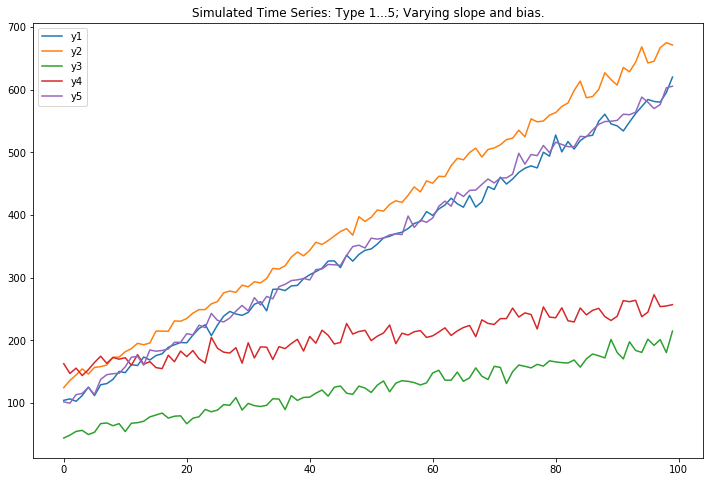

In [40]:
# 100 observations

x = np.arange(0,100)
iid_noise = lambda : np.random.normal(0,5,x.size)
m_std = 0.1


y1 = dgf_1(m=5, c=100)
y2 = dgf_2(m=5, c=130)
y3 = dgf_3(m=1, c=50)
y4 = dgf_4(m=1, c=75)
y5 = dgf_5(m=5, c=100)


plt.figure(figsize=(12,8))
plt.plot(x, y1, label='y1')
plt.plot(x, y2, label='y2')
plt.plot(x, y3, label='y3')
plt.plot(x, y4, label='y4')
plt.plot(x, y5, label='y5')
plt.legend()
plt.title('Simulated Time Series: Type 1...5; Varying slope and bias.')
plt.show()